In [1]:
# %matplotlib widget

In [2]:
# Import necessary libraries
import neo
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
from quantities import mV, ms
from scipy.signal import find_peaks

In [3]:
folder = '01_Caracterizacion_ECG_ratones'
file_name = 'R1_ECG'

t_init = 204
t_fin = 206

# Definir umbral
threshold = 0.5 * mV

In [4]:
# Read the SMR file
reader = neo.Spike2IO(filename=folder+'/'+file_name+'.smr')
data = reader.read()[0]

# Extract the signal you want to plot
signal = data.segments[0].analogsignals[0]

# Convertir el objeto AnalogSignal a un formato que pueda ser guardado
signal_array = signal.magnitude  # Magnitud en unidades base (por ejemplo, mV)
sampling_rate = signal.sampling_rate.magnitude  # Frecuencia de muestreo

scipy.io.savemat('MAT/'+file_name+'.mat', {'signal': signal_array, 'sampling_rate': sampling_rate})

ECG_signal = signal[:, 1]
square_ref = signal[:, 0]

# ECG_signal = signal[:, 0]
# square_ref = signal[:, 1]


print('Folder: ', folder)
print('File: ', file_name)
print('Sampling rate: ',signal.sampling_rate)

Folder:  01_Caracterizacion_ECG_ratones
File:  R1_ECG
Sampling rate:  10000.0 Hz


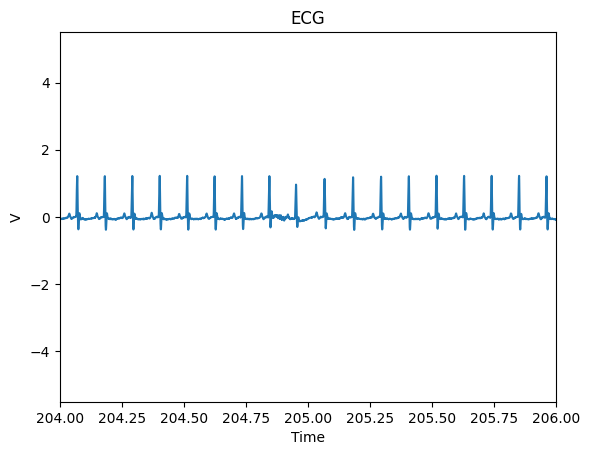

In [13]:
plt.figure(0)
plt.plot(signal.times, ECG_signal)
plt.xlabel('Time')
plt.ylabel('V')
plt.title('ECG')
plt.xlim([t_init, t_fin])
plt.show()

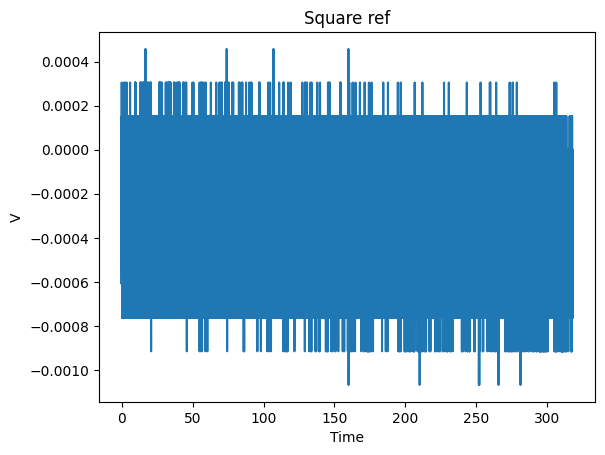

In [6]:
plt.figure(1)
plt.plot(signal.times, square_ref)
plt.xlabel('Time')
plt.ylabel('V')
plt.title('Square ref')
#plt.xlim([t_init, t_fin])
plt.show()

In [7]:
signal = ECG_signal
signal

AnalogSignal with 1 channels of length 3179067; units dimensionless; datatype float32
name: 'Signal stream 0'
annotations: {'stream_id': '0'}
sampling rate: 10000.0 Hz
time: 0.0 s to 317.9067 s

Sacar los picos


In [8]:
def extract_peaks(signal: neo.core.AnalogSignal, threshold: float):
    """
    Extrae los picos de una señal que estén por encima de un umbral.
    
    :param signal: Señal analógica de tipo AnalogSignal.
    :param threshold: Umbral mínimo para considerar un pico.
    :return: Índices y valores de los picos que superan el umbral.
    """
    
    # Convertir la señal a un array de NumPy
    data = signal.magnitude.flatten()
    
    # Encontrar todos los picos en la señal
    peaks, _ = find_peaks(data)
    
    # Filtrar los picos por el umbral
    valid_peaks = [i for i in peaks if data[i] > threshold]
    peak_values = [data[i] for i in valid_peaks]
    
    return valid_peaks, peak_values

In [9]:

# Extraer picos
peaks, peak_values = extract_peaks(signal, threshold)

# Mostrar resultados
print("Índices de picos:", peaks)
print("Valores de picos:", peak_values)


Índices de picos: [22, 25, 97, 99, 1438, 1452, 1464, 8433, 8917, 8921, 8924, 8927, 8936, 8965, 9039, 9091, 9117, 9755, 9757, 9825, 9827, 9830, 9837, 9839, 9898, 9903, 9907, 9909, 9957, 9979, 11573, 11582, 11643, 11675, 11696, 11788, 11905, 12162, 12319, 12322, 12350, 12356, 12359, 12765, 12784, 12903, 13226, 16172, 17102, 17216, 17422, 17425, 17457, 17699, 17730, 17768, 17816, 17853, 17891, 17934, 17936, 17956, 17981, 18039, 80623, 105383, 105580, 105613, 105616, 105625, 105627, 105664, 105666, 105674, 105684, 105696, 105707, 105709, 105721, 105728, 105745, 105767, 105770, 105796, 105804, 105806, 105814, 105819, 105822, 105832, 106346, 106348, 106428, 106631, 106637, 106640, 106664, 106687, 106690, 106951, 106964, 106972, 106978, 106981, 106986, 106991, 106996, 107000, 107010, 107018, 107023, 107028, 107035, 107041, 107047, 107066, 107122, 107158, 107168, 107244, 107246, 135120, 135297, 135498, 135653, 135723, 135888, 135894, 135966, 136075, 136577, 138223, 138240, 138252, 138262, 1382

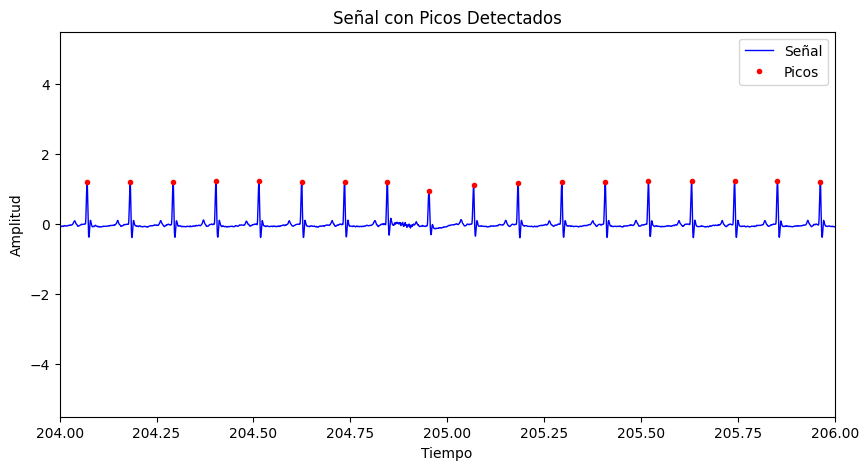

In [14]:
# Plotea la señal junto con los picos detectados.

time = signal.times.magnitude
data = signal.magnitude.flatten()

plt.figure(figsize=(10, 5))
plt.plot(time, data, 'b-', linewidth=1, label="Señal")
plt.plot(time[peaks], peak_values, 'ro', markersize=3, label="Picos")
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.title("Señal con Picos Detectados")
plt.xlim([t_init, t_fin])

plt.legend()
plt.show()

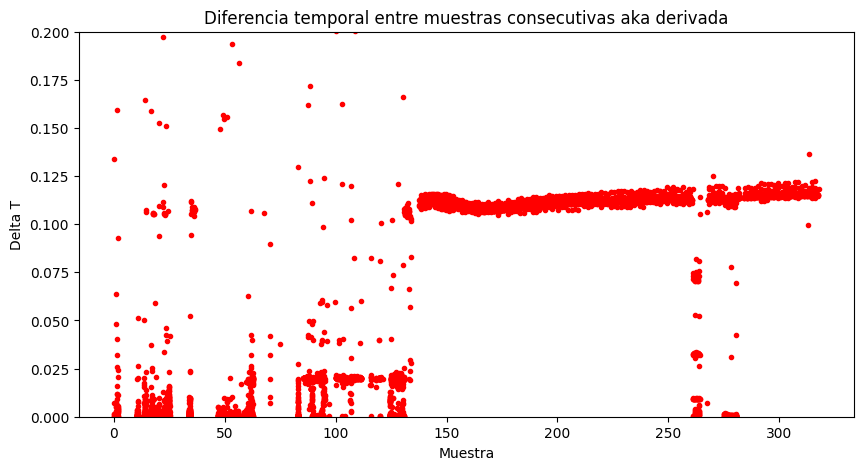

In [20]:
delta_t_peaks = np.diff(time[peaks])

plt.figure(figsize=(10, 5))
plt.plot(time[peaks][1:], delta_t_peaks, 'ro', markersize=3, label="Picos")
#plt.xlim([t_init, t_fin])
plt.ylim([0, 0.2])

plt.xlabel("Muestra")
plt.ylabel("Delta T")
plt.title("Diferencia temporal entre muestras consecutivas aka derivada")
plt.show()

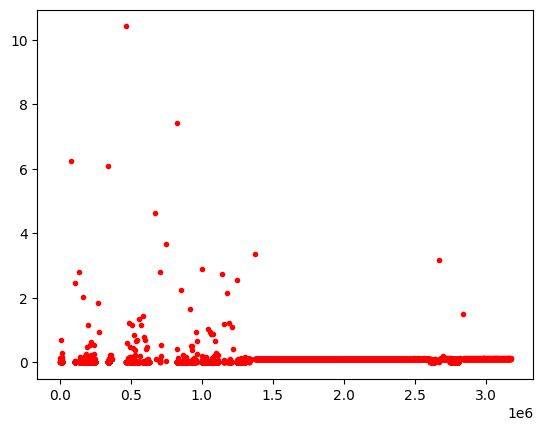

In [17]:
plt.plot(peaks[1:], delta_t_peaks, 'ro', markersize=3, label="Picos")


In [ ]:
f, t, Zxx = signal.stft(peak_values, 10000, nperseg=1000)

plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=amp, shading='gouraud')

plt.title('STFT Magnitude')

plt.ylabel('Frequency [Hz]')

plt.xlabel('Time [sec]')

plt.show()